# Generalized Isolation Forest

This is a Jupyter notebook demonstrating the basic usage of the `pygif` package, which provides an implementation to the Generalized Isolation Forest (GIF) algorithm. This algorithm has been originally proposed in:

> Buschjäger, S., Honysz, PJ. & Morik, K. Randomized outlier detection with trees. International Journal of Data Science and Analytics (2020). https://doi.org/10.1007/s41060-020-00238-w

For demonstration purposes, we instantiate an ordinary NumPy array, which holds our data we want to inspect for outlying observations: 

In [1]:
import numpy as np
from pygif import GeneralizedIsolationForest
import matplotlib.pyplot as plt

N = 1000
d = 50
X = np.random.random((N, d))

We may now construct an instance of the `GeneralizedIsolationForest`.

In [2]:
gif = GeneralizedIsolationForest(k=10, n_models=50, sample_size=256, kernel="rbf", kernel_scaling=[0.05], sigma=0.01)

This class implements the GIF algorithm and follow some basic principles already known from the `sklearn` package. Especially, we are providing the following three methods:

- `fit`: Learns a GIF model and assigns the learned model to the created class instance (i.e. `gif` in this case).
- `predict`: Applies a learned model to (potentially unknown) data and returns a vector of probabilities for every data vector.
- `fit_predict`: Learns a GIF model based on a data matrix and identifies outliers immediately, returning a vector of probabilities for every data vector.

We demonstrate the package using the `fit_predict` method, as follows:

In [3]:
gif.fit_predict(X)[:50]

array([0.00319063, 0.00337969, 0.00336875, 0.00364219, 0.00310625,
       0.00332812, 0.00315937, 0.00335625, 0.00349844, 0.00355625,
       0.00376406, 0.00337344, 0.00350469, 0.00339531, 0.00382813,
       0.00367187, 0.00353438, 0.00302031, 0.00339531, 0.00354063,
       0.00336719, 0.00365781, 0.00355625, 0.00334375, 0.00343906,
       0.00338906, 0.00346875, 0.00314844, 0.00303281, 0.00342188,
       0.00307031, 0.0032625 , 0.00333438, 0.00346875, 0.00334688,
       0.00365313, 0.00318125, 0.00339531, 0.00337813, 0.00327031,
       0.00345156, 0.00308281, 0.0031875 , 0.0033125 , 0.00288438,
       0.00347031, 0.00350156, 0.00316563, 0.00317031, 0.00326406])

The given output indicates the probabilities for the first fifty vectors by the region it has been assigned to. Values near one stand for rather inlying observations, while values near zero stand for rather outlying observations.

Beside varyiing the number of regions to find per node (i.e. $k$), the similarity threshold `sigma` and controlling the Ensemble parameters (i.e. `n_models` and `sample_size`), it is also possible to choose from different kernels: This implementation supports the RBF kernel and the Matèrn kernel with $\nu \in \left\lbrace 1/2, 3/2, 5/2 \right\rbrace$ by providing `rbf`, `matern-d1`, `matern-d3` or `matern-d5` for the `kernel` parameter. 

Please note, that the Matèrn kernel does not expect a single scaling parameter (like the RBF kernel does) but a list of scalings with a scale for every dimension of the input dataset. For example:

In [4]:
gif = GeneralizedIsolationForest(k=10, n_models=50, sample_size=256, kernel="matern-d3", kernel_scaling=np.repeat(0.05, d), sigma=0.01)

## Toy datasets

The following code snippet visually demonstrates the operation of the GIF algorithm. The code has been slightly modified from `scikit-learn`'s example of the original Isolation Forest algorithm.

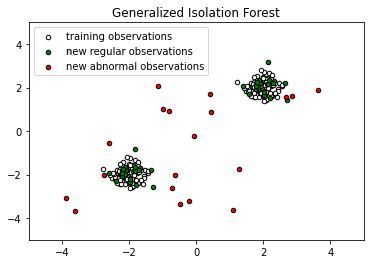

In [5]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# Fit the model.
clf = GeneralizedIsolationForest(k=10, n_models=50, sample_size=256, kernel="matern-d3", kernel_scaling=np.repeat(0.05, 2), sigma=0.01)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# Create the accompanying plot.
plt.title("Generalized Isolation Forest")

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c], ["training observations", "new regular observations", "new abnormal observations"], loc="upper left")
plt.show()